In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [43]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
print(x.shape,y.shape)

(569, 30) (569,)


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
#print(x_train.shape,x_test.shape)

from sklearn.svm import SVC
clf = SVC(kernel='linear',C=0.8)
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9694835680751174
0.965034965034965


In [64]:
from sklearn.model_selection import GridSearchCV
from common.utils import plot_param_curve
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [77]:
gammas = np.linspace(0,0.0075,100)
param_grid = {'gamma':gammas}
clf2 = GridSearchCV(SVC(),param_grid,cv=5)
clf2.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([0.00000e+00, 7.57576e-05, ..., 7.42424e-03, 7.50000e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print(clf2.best_params_,clf2.best_score_)

{'gamma': 0.00015151515151515152} 0.9349736379613357


<module 'matplotlib.pyplot' from '/home/arcadia/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

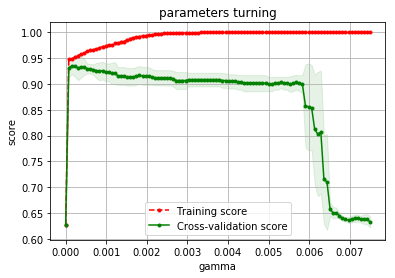

In [79]:
plot_param_curve(plt,gammas,clf2.cv_results_,xlabel='gamma')

In [84]:
import time
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve

In [ ]:
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
title = 'learning curves for Guassion Kernel'

start = time.clock()
plt.figure(figsize=(8,6),dpi=100)
clf3 = SVC(C=1.0,kernel='poly',gamma=0.01)
plot_learning_curve(plt,clf3,title,x,y,ylim=(0.5,1.01),cv=cv)